In [35]:
import networkx as nx
import json
import graphistry
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", username="yufu", password="oilec&graphisty")


In [36]:
labels_dict = {
    0: 'lr', 
    1: 'em', 
    2: 'fn', 
    3: 'fi', 
    4: 'ps',
    5: 'multi_affiliations', 
    6: 'indetermined'
}

In [37]:
with open('predictions/elyzee.json', 'r') as f:
    predictions = json.load(f)

json_file = 'elyzee_data/elyzee_train.json'
graph_train_networkx = nx.node_link_graph(json.load(open(json_file)))

for node, pred  in zip(graph_train_networkx, predictions['train']):
    graph_train_networkx.nodes[node]['y_true'] = labels_dict[pred['y_true']]
    
    graph_train_networkx.nodes[node]['y_pred_fcnn'] = labels_dict[pred['y_pred_fcnn']]
    graph_train_networkx.nodes[node]['y_pred_gcn1'] = labels_dict[pred['y_pred_gcn1']]
    graph_train_networkx.nodes[node]['y_pred_gcn2'] = labels_dict[pred['y_pred_gcn2']]
    
    graph_train_networkx.nodes[node]['y_pred_fcnn_correct'] = pred['y_true'] == pred['y_pred_fcnn']
    graph_train_networkx.nodes[node]['y_pred_gcn1_correct'] = pred['y_true'] == pred['y_pred_gcn1']
    graph_train_networkx.nodes[node]['y_pred_gcn2_correct'] = pred['y_true'] == pred['y_pred_gcn2']
    



json_file = 'elyzee_data/elyzee_test.json'
graph_test_networkx = nx.node_link_graph(json.load(open(json_file)))

for node, pred  in zip(graph_test_networkx, predictions['test']):
    graph_test_networkx.nodes[node]['y_true'] = labels_dict[pred['y_true']]
    
    graph_test_networkx.nodes[node]['y_pred_fcnn'] = labels_dict[pred['y_pred_fcnn']]
    graph_test_networkx.nodes[node]['y_pred_gcn1'] = labels_dict[pred['y_pred_gcn1']]
    graph_test_networkx.nodes[node]['y_pred_gcn2'] = labels_dict[pred['y_pred_gcn2']]
    
    graph_test_networkx.nodes[node]['y_pred_fcnn_correct'] = pred['y_true'] == pred['y_pred_fcnn']
    graph_test_networkx.nodes[node]['y_pred_gcn1_correct'] = pred['y_true'] == pred['y_pred_gcn1']
    graph_test_networkx.nodes[node]['y_pred_gcn2_correct'] = pred['y_true'] == pred['y_pred_gcn2']
    


In [38]:
graph_train = graphistry.edges(graph_train_networkx, source='source', destination='target')
graph_train.plot()

Failed memoization speedup attempt due to Pandas internal hash function failing. Continuing without memoization speedups.This is fine, but for speedups around skipping re-uploads of previously seen tables, try identifying which columns have types that Pandas cannot hash, and convert them to hashable types like strings.

In [39]:
graph_test = graphistry.edges(graph_test_networkx, source='source', destination='target')
graph_train.plot()

Failed memoization speedup attempt due to Pandas internal hash function failing. Continuing without memoization speedups.This is fine, but for speedups around skipping re-uploads of previously seen tables, try identifying which columns have types that Pandas cannot hash, and convert them to hashable types like strings.

<BarContainer object of 7 artists>

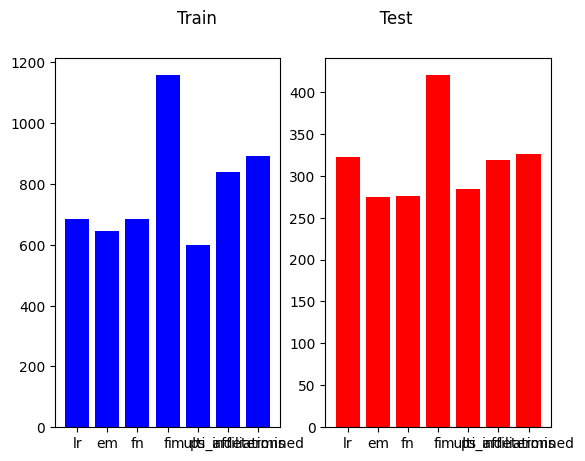

In [34]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Train                               Test')
ax1.bar(labels_dict.values(), [[labels_dict[pred['y_true']] for pred in predictions['train']].count(label) for label in labels_dict.values()], color='blue')
ax2.bar(labels_dict.values(), [[labels_dict[pred['y_true']] for pred in predictions['test']].count(label) for label in labels_dict.values()], color='red')